In [46]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam

# Build model using early stopping
from tensorflow.keras.callbacks import EarlyStopping

# Import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1


# For reproducibility
np.random.seed(42)

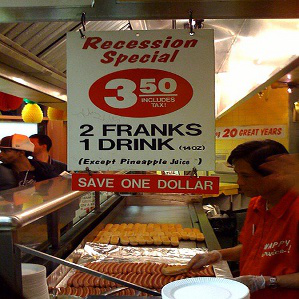

In [2]:
hd = load_img(path='./train/hotdog/1.jpg')
hd

In [3]:
# create list of hot-dogs from train
hd_arrays = []
# define filepath for hotdog class
hd_path = './train/hotdog/'

# convert each image to normalized array and store
for file in os.listdir(hd_path):
    try:
        # target_size automatically resizes each img on import
        hd = load_img(hd_path + file, target_size=(256, 256))
        hd_arr = img_to_array(hd) / 255
        hd_arrays.append(hd_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(hd_arrays)} pictures converted.')    

1500 pictures converted.


In [4]:
# create list of hot-dogs from test

# define filepath for hotdog class
hd_path = './test/hotdog/'

# convert each image to normalized array and store
for file in os.listdir(hd_path):
    try:
        # target_size automatically resizes each img on import
        hd = load_img(hd_path + file, target_size=(256, 256))
        hd_arr = img_to_array(hd) / 255
        hd_arrays.append(hd_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(hd_arrays)} pictures converted.')    

1822 pictures converted.


In [5]:
# create list of no-hot-dogs
nhd_arrays = []
# define filepath for nothot class
nhd_path = './train/nothotdog/'

# convert each image to normalized array and store
for file in os.listdir(nhd_path):
    try:
        nhd = load_img(nhd_path + file, target_size=(256, 256))
        nhd_arr = img_to_array(nhd) / 255
        nhd_arrays.append(nhd_arr)
    except:
        print(f'Error for file: {file}')
    
print(f'{len(nhd_arrays)} pictures converted.')    

1500 pictures converted.


In [6]:
# create list of no-hot-dogs

# define filepath for nothot class
nhd_path = './test/nothotdog/'

# convert each image to normalized array and store
for file in os.listdir(nhd_path):
    try:
        nhd = load_img(nhd_path + file, target_size=(256, 256))
        nhd_arr = img_to_array(nhd) / 255
        nhd_arrays.append(nhd_arr)
    except:
        print(f'Error for file: {file}')
    
print(f'{len(nhd_arrays)} pictures converted.')    

1822 pictures converted.


In [7]:
# X should contain both hotdogs and not hotdogs
X = hd_arrays + nhd_arrays
# convert to array and check shape
X_arr = np.array(X)
print(f'X shape: {X_arr.shape}')

# 1 for hotdogs, 0 for not-hotdogs
y = [1] * 1822 + [0] * 1822
# convert to array and check shape
y = np.array(y)
print(f'y shape: {y.shape}')

X shape: (3644, 256, 256, 3)
y shape: (3644,)


In [8]:
#Creating Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
X_train = np.array(X_train)#.reshape(2250, 256, 256, 3)
X_train.shape

(2733, 256, 256, 3)

In [10]:
X_test = np.array(X_test)#.reshape(750, 256, 256, 3)
X_test.shape

(911, 256, 256, 3)

In [11]:
X_train.shape

(2733, 256, 256, 3)

In [12]:
y_train.shape

(2733,)

In [68]:
#Build out the CNN model using best parameters from GridSearch
model = Sequential()

#Perform Convolution
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.001)))
#Perform maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Perform 2nd COnv and pool
model.add(Conv2D(48, (3,3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv connected to dense layer that is fully connected
model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))

#model.add(Dense(64, activation='relu'))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
    
#Output layer
model.add(Dense(1, activation='sigmoid'))#sigmoid since binary classification

In [69]:
#Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

early_stop = EarlyStopping(patience=3)#How many epochs do we allow for increase in val-loss before we short circuit


In [ ]:
#Fit the model
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs = 10, callbacks=[early_stop],
          batch_size = 64)

Epoch 1/10
43/43 [==============================] - 146s 3s/step - loss: 2.7377 - accuracy: 0.5253 - precision: 0.5290 - recall: 0.5786 - val_loss: 1.0309 - val_accuracy: 0.4995 - val_precision: 0.4995 - val_recall: 1.0000
Epoch 2/10
43/43 [==============================] - 135s 3s/step - loss: 1.0029 - accuracy: 0.5339 - precision: 0.5264 - recall: 0.9060 - val_loss: 0.9317 - val_accuracy: 0.6213 - val_precision: 0.5772 - val_recall: 0.9033
Epoch 3/10
22/43 [==============>...............] - ETA: 1:08 - loss: 0.9090 - accuracy: 0.6149 - precision: 0.6439 - recall: 0.5926

#DIFFERENT APPROACH FOR STREAMliT

In [29]:
# Define a simple sequential model
def create_model():
    model = Sequential()
    model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = (256,256,3)))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    #convolution then pool
    model.add(Conv2D(16, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
    model.add(Flatten())
    
    # 1st FNN hidden layer
    model.add(Dense(16, activation = 'relu'))
    
    #output_layer
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
    return model

# Create a basic model instance
model = create_model()
# Display the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                984080    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [78]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X_train, 
          y_train,  
          epochs=5,
          batch_size=16,
          validation_data=(X_test, y_test),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/3
141/141 [==============================] - ETA: 0s - loss: 0.6577 - acc: 0.6209
Epoch 00001: saving model to training_1\cp.ckpt
141/141 [==============================] - 81s 576ms/step - loss: 0.6577 - acc: 0.6209 - val_loss: 0.6025 - val_acc: 0.6867
Epoch 2/3
141/141 [==============================] - ETA: 0s - loss: 0.5621 - acc: 0.7187
Epoch 00002: saving model to training_1\cp.ckpt
141/141 [==============================] - 102s 722ms/step - loss: 0.5621 - acc: 0.7187 - val_loss: 0.5890 - val_acc: 0.6987
Epoch 3/3
141/141 [==============================] - ETA: 0s - loss: 0.4865 - acc: 0.7711
Epoch 00003: saving model to training_1\cp.ckpt
141/141 [==============================] - 102s 725ms/step - loss: 0.4865 - acc: 0.7711 - val_loss: 0.6568 - val_acc: 0.6493


In [79]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [82]:
# Evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

24/24 - 8s - loss: 0.6568 - acc: 0.6493
Untrained model, accuracy: 64.93%


In [83]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

24/24 - 7s - loss: 0.6568 - acc: 0.6493
Restored model, accuracy: 64.93%


In [81]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [71]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [72]:
# Check its architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3936288   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [75]:
# Evaluate the restored model
loss, acc = new_model.evaluate(X_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(X_test).shape)

24/24 - 12s - loss: 0.6931 - acc: 0.5000
Restored model, accuracy: 50.00%
(750, 1)


In [46]:
## Building Grid Search for image processing

# Add an arugment of number of layers to the function (and loop through it) 

# Define a function that will go in the scikit-learn wrapper
def modellayers_func(n_cnn_layers=1, n_dense_layers=2, num_nodes=16, n_filtersize=3):
    model = Sequential()

    #Perform Convolution
    model.add(Conv2D(32, (n_filtersize, n_filtersize), activation = 'relu', input_shape=(256, 256, 3)))
    #Perform maxpooling
    model.add(MaxPooling2D(pool_size=(2,2)))

    for i in range(n_cnn_layers):
        #Perform future COnv and pool
        model.add(Conv2D(32, (n_filtersize, n_filtersize), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=2))
        model.add(Dropout(0.5))
   
    model.add(Flatten())

    for i in range(n_dense_layers):
        model.add(Dense(num_nodes, activation='relu'))
        model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='bce', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
   
    return model

In [59]:
nn = KerasClassifier(build_fn=modellayers_func, epochs=5, batch_size=32)

In [ ]:
params = {
    'epochs': [10, 20],
    'n_cnn_layers': [1,2],
    'n_dense_layers': [2,3],
    'n_filtersize': [3,5],
    'num_nodes':[32]
}

gs_deep = GridSearchCV(estimator = nn, param_grid=params, cv=2, verbose=12)
gs_deep.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START epochs=10, n_cnn_layers=1, n_dense_layers=2, n_filtersize=3, num_nodes=32
Epoch 1/10
36/36 [==============================] - 39s 1s/step - loss: 0.7239 - accuracy: 0.4942 - precision: 0.5129 - recall: 0.4096
Epoch 2/10
36/36 [==============================] - 37s 1s/step - loss: 0.6920 - accuracy: 0.5289 - precision: 0.5416 - recall: 0.5714
Epoch 3/10
36/36 [==============================] - 35s 963ms/step - loss: 0.6775 - accuracy: 0.5876 - precision: 0.5825 - recall: 0.7108
Epoch 4/10
36/36 [==============================] - 36s 1s/step - loss: 0.6393 - accuracy: 0.6453 - precision: 0.6468 - recall: 0.6902
Epoch 5/10
36/36 [==============================] - 36s 988ms/step - loss: 0.6212 - accuracy: 0.6764 - precision: 0.6709 - recall: 0.7332
Epoch 6/10
36/36 [==============================] - 36s 1s/step - loss: 0.5806 - accuracy: 0.7058 - precision: 0.6894 - recall: 0.7831
Epoch 7/10
36/36 [==========

In [49]:
print(gs_deep.best_score_, gs_deep.best_params_)

-0.6418039202690125 {'epochs': 10, 'n_cnn_layers': 2, 'n_dense_layers': 2, 'n_filtersize': 3, 'num_nodes': 32}


In [61]:
# Save the entire model as a SavedModel.
!mkdir saved_model_g
model.save('saved_model_g/my_model')

INFO:tensorflow:Assets written to: saved_model_g/my_model\assets


INFO:tensorflow:Assets written to: saved_model_g/my_model\assets
